In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# statsmodels / ols

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.19e-15
Time:                        15:23:44   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.0

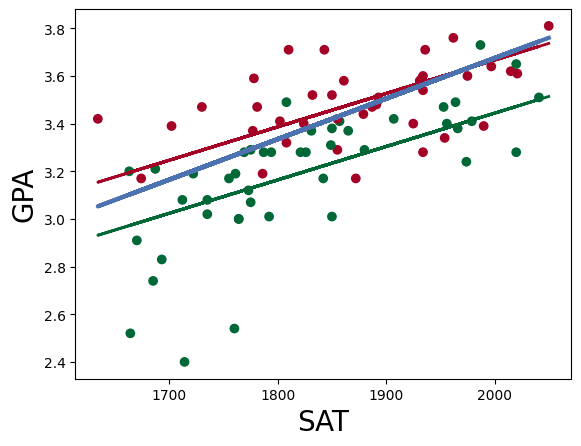

   const   SAT  Attendance  Predictions
0      1  1700           0     3.023513
1      1  1670           1     3.204163


In [2]:
raw_data = pd.read_csv('data/1.03. Dummies.csv')
data = raw_data.copy()

data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})
y = data['GPA']
x1 = data[['SAT','Attendance']]

x = sm.add_constant(x1)
model_ols = sm.OLS(y,x).fit()
print(model_ols.summary())

plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT'] + 0.275
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837', label ='regression line1')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026', label ='regression line2')
fig = plt.plot(data['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

new_data=pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
new_data=new_data[['const','SAT','Attendance']] # to ensure order isn't alphabetical
predictions=model_ols.predict(new_data)
new_data['Predictions']=predictions
print(new_data)

In [4]:
raw_data = pd.read_csv('data/Startups.csv')
data = raw_data.copy()
# data.head()

y = data['Profit']

x1 = data[['R&D Expenditure','Administration Expenditure','Marketing Expenditure']]
x = sm.add_constant(x1)
model_ols = sm.OLS(y,x).fit()
model_ols.summary()

# AE, ME insignificant so remove

x1 = data['R&D Expenditure']
x = sm.add_constant(x1)
model_ols = sm.OLS(y,x).fit()
model_ols.summary()

new_data=pd.DataFrame({'const':1, 'R&D Expenditure':[125000]})
model_ols.predict(new_data)

0    155819.320509
dtype: float64

# sklearn